In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df=pd.read_csv('survey.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [4]:
# 1. Drop the 'comments' column (too many missing values)
df.drop(columns=['comments'], inplace=True)

In [5]:
df.fillna({'self_employed':'Unknown'},inplace=True)

In [6]:
df.fillna({'work_interfere':df['work_interfere'].mode()[0]}, inplace=True)

In [7]:
df.drop(columns=['state'], inplace=True)

In [8]:
df['Gender'] = df['Gender'].str.lower().str.strip()

In [9]:
gender_map = {
    'male': 'Male', 'm': 'Male', 'man': 'Male', 'male-ish': 'Male', 'malr': 'Male', 'maile': 'Male',
    'female': 'Female', 'f': 'Female', 'woman': 'Female', 'femake': 'Female', 'cis female': 'Female',
    'trans-female': 'Transgender', 'trans woman': 'Transgender', 'trans-female (mtf)': 'Transgender',
    'trans male': 'Transgender', 'trans man': 'Transgender',
    'genderqueer': 'Non-binary', 'agender': 'Non-binary', 'non-binary': 'Non-binary',
    'other': 'Other', 'neuter': 'Other', 'fluid': 'Other', 'all': 'Other'
}

In [10]:
df['Gender'] = df['Gender'].map(gender_map).fillna('Other')

In [11]:
df.reset_index(drop=True, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   self_employed              1259 non-null   object
 5   family_history             1259 non-null   object
 6   treatment                  1259 non-null   object
 7   work_interfere             1259 non-null   object
 8   no_employees               1259 non-null   object
 9   remote_work                1259 non-null   object
 10  tech_company               1259 non-null   object
 11  benefits                   1259 non-null   object
 12  care_options               1259 non-null   object
 13  wellness_program           1259 non-null   object
 14  seek_hel

In [13]:
sns.set(style="whitegrid")
plt.style.use("ggplot")

## Gender Distribution

C:\Users\RK\AppData\Local\Temp\ipykernel_5424\3654805732.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='Set2')


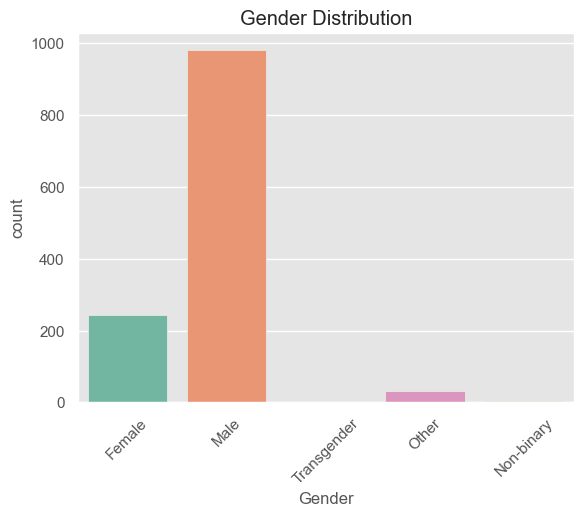

In [14]:
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title('Gender Distribution')
plt.xticks(rotation=45)
plt.show()

## Mental Health Treatment by Gender

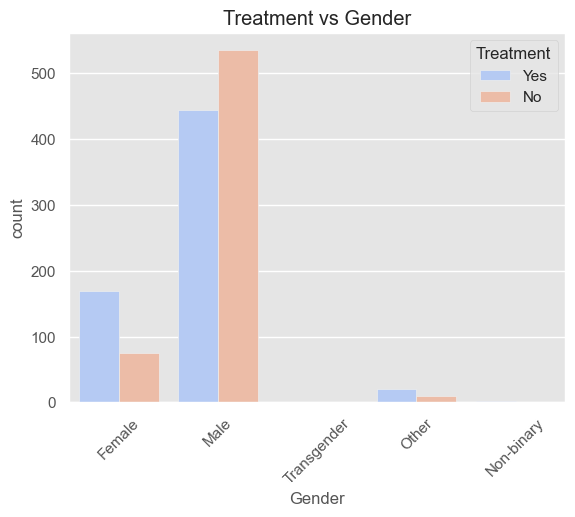

In [16]:
sns.countplot(data=df, x='Gender', hue='treatment', palette='coolwarm')
plt.title('Treatment vs Gender')
plt.xticks(rotation=45)
plt.legend(title='Treatment')
plt.show()

## Country-wise Mental Health Support

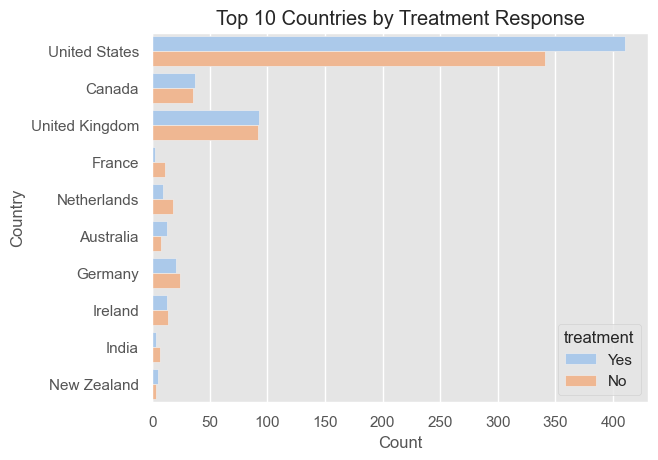

In [17]:
top_countries = df['Country'].value_counts().head(10).index
sns.countplot(data=df[df['Country'].isin(top_countries)], y='Country', hue='treatment', palette='pastel')
plt.title('Top 10 Countries by Treatment Response')
plt.xlabel('Count')
plt.show()

## Treatment by Company Size

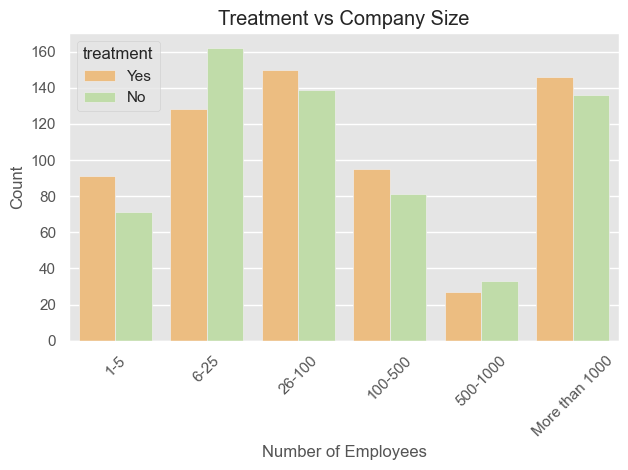

In [19]:
size_order = [
    '1-5',
    '6-25',
    '26-100',
    '100-500',
    '500-1000',
    'More than 1000'
]

# Plot with ordered x-axis
sns.countplot(data=df, x='no_employees', hue='treatment', order=size_order, palette='Spectral')
plt.title('Treatment vs Company Size')
plt.xlabel('Number of Employees')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlation Heatmap

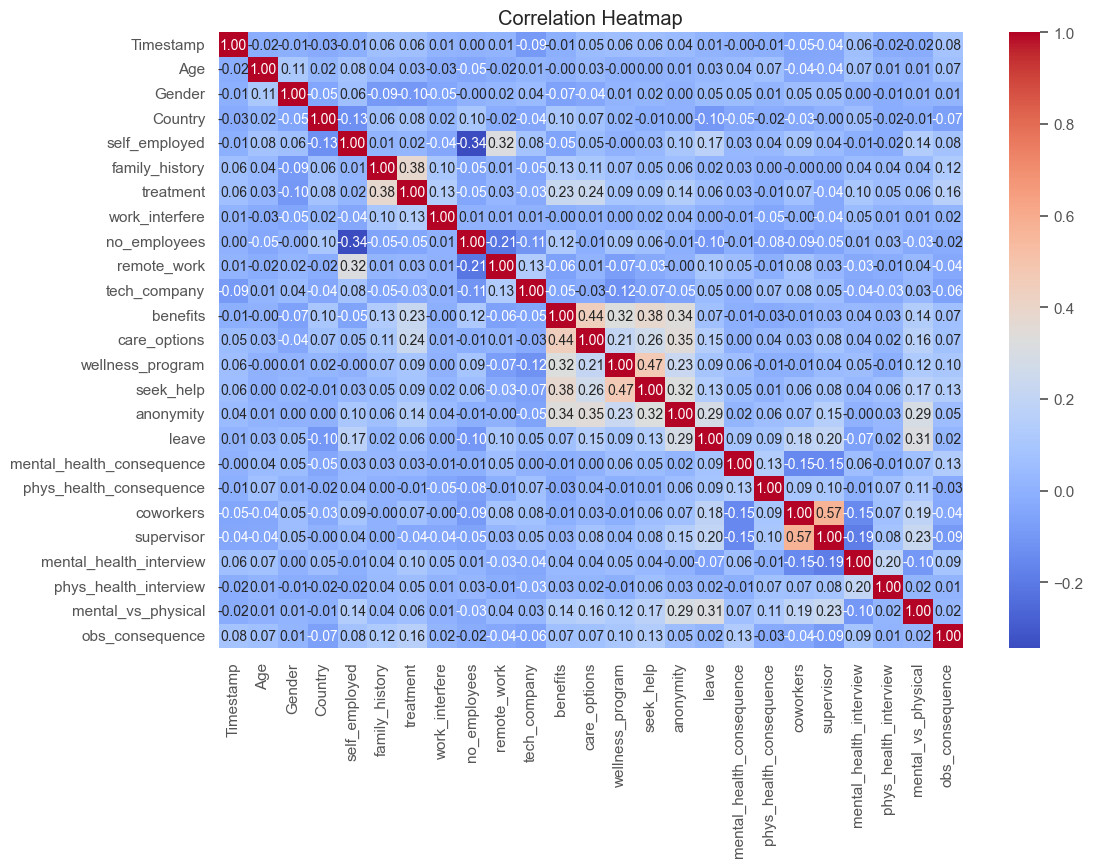

In [23]:
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [25]:
df = df.drop(columns=['Country'])

In [26]:
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [27]:
X = df.drop("treatment", axis=1)
y = df["treatment"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [30]:
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[93 36]
 [32 91]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.72      0.73       129
           1       0.72      0.74      0.73       123

    accuracy                           0.73       252
   macro avg       0.73      0.73      0.73       252
weighted avg       0.73      0.73      0.73       252



# Observations:

* Males form the majority of respondents.

* About 48–52% of participants reported having sought treatment for mental health.

* The majority of responses are from the United States, followed by Canada, UK, and Germany.

* Smaller companies (1–25 employees) show a higher rate of employees seeking treatment.

* People working remotely have similar treatment rates to on-site workers.

* Employees who feel comfortable talking to coworkers are more likely to seek treatment.